In [2]:
import scanpy as sc
import anndata as ad
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.sparse as sp
from scipy.stats import pearsonr

In [42]:
raw_adata = ad.read_h5ad("data/rawHD.h5ad")

In [56]:
# super_adata = ad.read_h5ad("data/superHD_ImSpiRE.h5ad")
# super_adata = ad.read_h5ad("data/superHD_xfuse.h5ad")
super_adata = ad.read_h5ad("data/superHD_iStar.h5ad")

In [34]:
super_adata.obs[super_adata.obs["in_tissue"]==1]

,in_tissue,array_row,array_col
barcode,,,
s_016um_00091_00374-1,1,91,374
s_016um_00091_00375-1,1,91,375
s_016um_00092_00374-1,1,92,374
s_016um_00092_00375-1,1,92,375
s_016um_00092_00376-1,1,92,376
...,...,...,...
s_016um_00402_00241-1,1,402,241
s_016um_00402_00242-1,1,402,242
s_016um_00402_00243-1,1,402,243


In [39]:
super_adata.obs.loc["s_016um_00091_00374-1",:]

in_tissue      1
array_row     91
array_col    374
Name: s_016um_00091_00374-1, dtype: int64

In [49]:
np.mean(np.abs(super_adata.obsm["spatial"] - raw_adata.obsm["spatial"]))

0.018112155378695753

In [47]:
super_adata.obsm["spatial"]

array([[27707.37462818, -3273.20476223],
       [27648.90381693, -3273.23879107],
       [27590.43300568, -3273.27281992],
       ...,
       [ 3422.75637463, 21082.01586432],
       [ 3364.28556338, 21081.98183548],
       [ 3305.81475213, 21081.94780663]])

In [40]:
raw_adata.obs.loc["s_016um_00091_00374-1",:]

in_tissue      0
array_row     91
array_col    374
Name: s_016um_00091_00374-1, dtype: uint32

In [25]:
raw_adata[raw_adata.obs["in_tissue"]==1]

View of AnnData object with n_obs × n_vars = 107274 × 2000
    obs: 'in_tissue', 'array_row', 'array_col'
    var: 'gene_ids', 'feature_types', 'genome'
    uns: 'spatial'
    obsm: 'spatial'

In [22]:
super_adata[super_adata.obs["in_tissue"]==1]

View of AnnData object with n_obs × n_vars = 107274 × 2000
    obs: 'in_tissue', 'array_row', 'array_col'
    var: 'gene_ids', 'feature_types', 'genome'
    uns: 'spatial'
    obsm: 'spatial'

/home/yiriso/anaconda3/envs/DataReader/lib/python3.10/site-packages/scanpy/preprocessing/_normalization.py:234: UserWarning: Some cells have zero counts
  warn(UserWarning("Some cells have zero counts"))


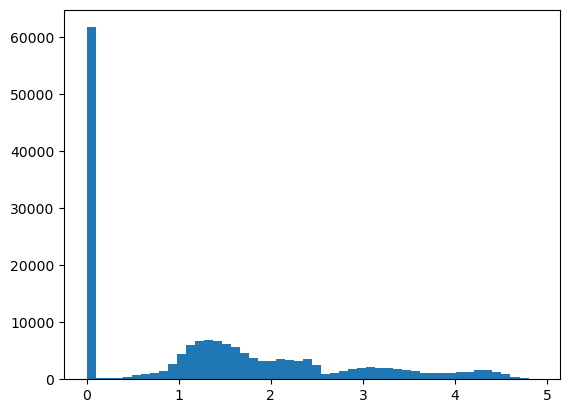

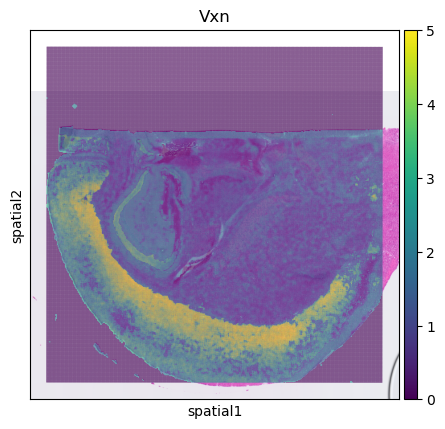

In [57]:
gene_name = "Vxn" 
# adata = super_adata[super_adata.obs['in_tissue']==1]
adata = super_adata
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)
sc.pp.highly_variable_genes(adata,n_top_genes=2000)
plt.hist(adata[:, gene_name].X.toarray().flatten(), bins=50)
plt.show()
sc.pl.spatial(
    adata,
    color=gene_name,
    vmin=0,   # 最小值
    vmax=5,   # 最大值
    color_map="viridis"
)

/home/yiriso/anaconda3/envs/DataReader/lib/python3.10/site-packages/scanpy/preprocessing/_normalization.py:234: UserWarning: Some cells have zero counts
  warn(UserWarning("Some cells have zero counts"))


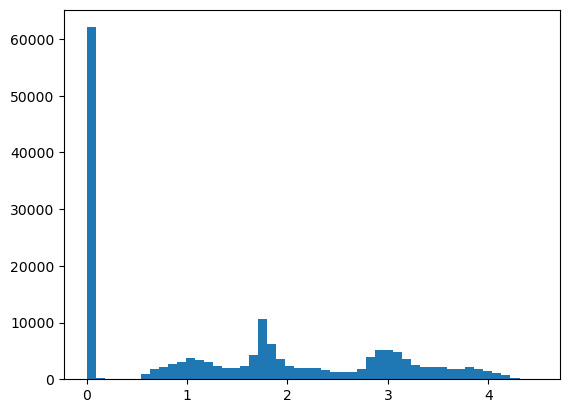

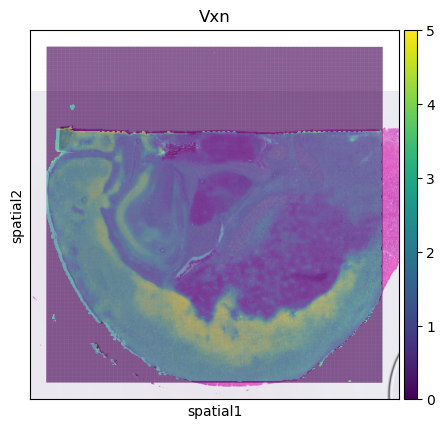

In [55]:
gene_name = "Vxn" 
# adata = super_adata[super_adata.obs['in_tissue']==1]
adata = super_adata
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)
sc.pp.highly_variable_genes(adata,n_top_genes=2000)
plt.hist(adata[:, gene_name].X.toarray().flatten(), bins=50)
plt.show()
sc.pl.spatial(
    adata,
    color=gene_name,
    vmin=0,   # 最小值
    vmax=5,   # 最大值
    color_map="viridis"
)

/home/yiriso/anaconda3/envs/DataReader/lib/python3.10/site-packages/scanpy/preprocessing/_normalization.py:234: UserWarning: Some cells have zero counts
  warn(UserWarning("Some cells have zero counts"))


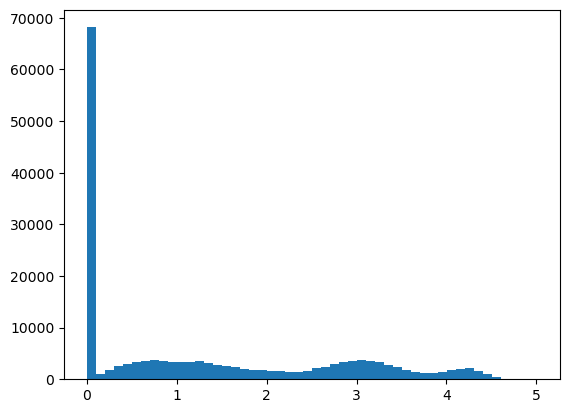

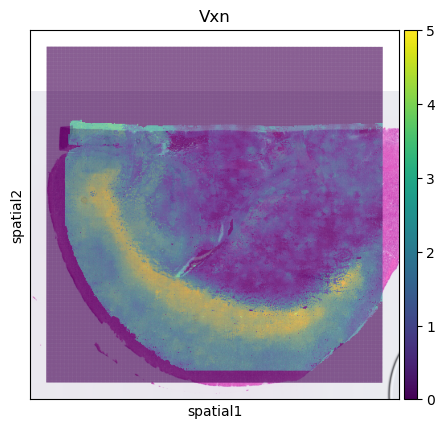

In [52]:
gene_name = "Vxn" 
# adata = super_adata[super_adata.obs['in_tissue']==1]
adata = super_adata
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)
sc.pp.highly_variable_genes(adata,n_top_genes=2000)
plt.hist(adata[:, gene_name].X.toarray().flatten(), bins=50)
plt.show()
sc.pl.spatial(
    adata,
    color=gene_name,
    vmin=0,   # 最小值
    vmax=5,   # 最大值
    color_map="viridis"
)

/home/yiriso/anaconda3/envs/DataReader/lib/python3.10/site-packages/scanpy/preprocessing/_normalization.py:234: UserWarning: Some cells have zero counts
  warn(UserWarning("Some cells have zero counts"))


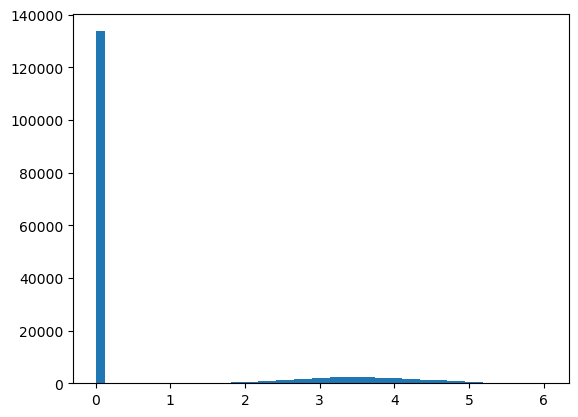

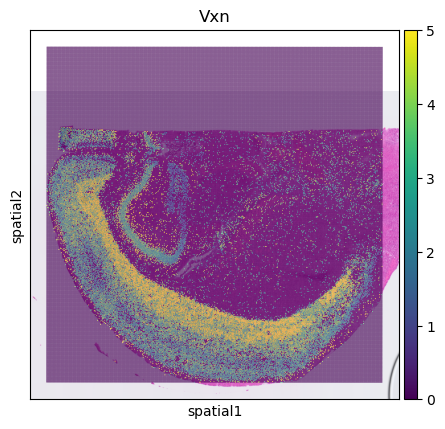

In [53]:
gene_name = "Vxn"  # 替换为你要可视化的基因名
adata = raw_adata[raw_adata.obs['in_tissue']==1]
adata = raw_adata
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)
plt.hist(adata[:, gene_name].X.toarray().flatten(), bins=50)
plt.show()
sc.pl.spatial(
    adata,
    color=gene_name,
    vmin=0,   # 最小值
    vmax=5,   # 最大值
    color_map="viridis"
)